In [1]:
# ---<参考情報 : PolynomialFeatures>-----------------------------------------------
'''
fit()
渡されたデータの最大値、最小値、平均、標準偏差、傾き...などの統計を取得して、内部メモリに保存する。

transform()
fit()で取得した統計情報を使って、渡されたデータを実際に書き換える。

fit_transform()
fit()を実施した後に、同じデータに対してtransform()を実施する。
'''
# ---------------------------------------------------

'\nfit()\n渡されたデータの最大値、最小値、平均、標準偏差、傾き...などの統計を取得して、内部メモリに保存する。\n\ntransform()\nfit()で取得した統計情報を使って、渡されたデータを実際に書き換える。\n\nfit_transform()\nfit()を実施した後に、同じデータに対してtransform()を実施する。\n'

In [2]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
#データの読み込み
train_data = pd.read_csv("data_quiz_25.csv")
print(train_data.head())

     Var_X    Var_Y
0 -0.33532  6.66854
1  0.02160  3.86398
2 -1.19438  5.16161
3 -0.65046  8.43823
4 -0.28001  5.57201


In [4]:
#X = train_data[["Var_X"]]     # DataFrame型で保存される
#X = train_data["Var_X"].value # Vector、(20,)になる
X = train_data["Var_X"].values.reshape(-1,1) # (20,1), 行数は指定しない、列数は1を指定
y = train_data["Var_Y"].values

## X を PolynomialFeatures　用の形式に変換する

In [5]:
# 4次までの変数を作成するインスタンスの生成
poly_feat = PolynomialFeatures(degree=4) # 4次の式

# X を PolynomialFeatures　用の形式に変換する:型はnd-array
X_poly   = poly_feat.fit_transform(X)

In [6]:
print(type(X_poly))
print(X_poly.shape) #　4次　だから　5列　ある

<class 'numpy.ndarray'>
(20, 5)


## LinearRegressionとPolynominalを併用して曲線近似

In [7]:
# 近似する fit
poly_model = LinearRegression( fit_intercept=False ).fit( X_poly , y )

# 係数を取得する
coef_data = poly_model.coef_

In [8]:
# 予測用のデータ初期化
y_pred = np.zeros( [len(X), 1])

# Xを昇順にソートする, axisの設定が必要
X_sorted = np.sort(X, axis=0)

# 予測係数を用いて、近似曲線データを作成する
for i, keisu in enumerate(coef_data):
  y_pred = y_pred + keisu * X_sorted**i

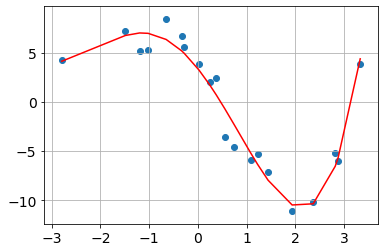

In [10]:
# Figure
plt.figure()
plt.rcParams['font.size'] = 14

# 予測近似曲線
plt.plot(X_sorted, y_pred, 'r')
#plt.hold(True)

# 入力データ
plt.scatter(X,y)
plt.grid()